# Neural Networks with a Deep Learning Framework - PyTorch

1. In Practical9a.ipynb, we will first look at the same problem from the Practical 8 - classification of sklearn "moons".
2. Then, in Practical9b.ipynb, we will look at a far more complex problem of classification of hand-written numbers in the MNIST dataset.

General imports

In [1]:
%matplotlib inline  
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import torch
import torch.nn as nn

Generate "moons" dataset

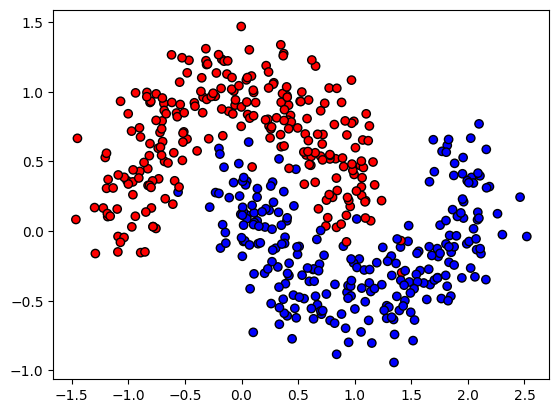

[[ 1.09679464e+00  2.18529079e-01]
 [ 5.99214288e-01 -3.60624534e-01]
 [ 4.33328389e-01  8.30265890e-01]
 [ 1.14159721e+00  7.39300385e-02]
 [-3.43166059e-01  8.49589887e-01]
 [ 8.99910189e-01 -1.08339069e-01]
 [ 9.02763017e-01  4.62757766e-01]
 [-5.10054649e-01  7.12028616e-01]
 [ 5.32744539e-01  9.97970637e-01]
 [ 1.66672722e+00 -3.84366384e-01]
 [ 1.86525560e+00  1.53769749e-01]
 [ 1.96145778e+00  9.34638275e-02]
 [-6.80598895e-02  1.00529828e+00]
 [ 1.06229732e+00 -4.09155255e-01]
 [ 8.84200286e-01  9.23587019e-01]
 [ 9.30942173e-01  6.89791200e-01]
 [ 1.05596360e+00 -7.23927540e-01]
 [-7.56125153e-01  1.88675457e-02]
 [ 2.44378087e-01  1.49315173e-01]
 [ 1.57769294e+00 -2.84030908e-01]
 [ 7.45446698e-01  3.68416514e-02]
 [-8.26009636e-01  3.27979713e-01]
 [ 4.00709000e-01  7.38822590e-02]
 [-1.01264974e+00  3.62405280e-01]
 [-9.60870075e-01  3.53064263e-01]
 [ 1.12926397e+00 -3.72374373e-01]
 [ 1.56551217e+00 -1.45112068e-01]
 [ 1.46600701e-01 -9.05224665e-02]
 [ 1.10160453e+00  8

In [2]:
X, y = make_moons(n_samples = 500, noise = 0.2, random_state = 101)

# visualisation
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c = y, edgecolors='k', cmap = cm_bright)
plt.show()
print(X)
print(y)

# Before jumping into making a neural network, let's look at PyTorch Tensors

- __Tensors__
    - Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing. 
    - To aid usability for those used to using NumPY, PyTorch adopt a similar API.

Let's look at creating NumPy arrays and PyTorch Tensors and compare.

In [3]:
# numpy array construction from a Python list
my_list = [[1,2,3],[4,5,6]]
first_array = np.array(my_list) # 2x3 array
print("Array Type: {}".format(type(first_array))) # type
print("Array Shape: {}".format(np.shape(first_array))) # shape
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


In [4]:
# pytorch Tensor construction from a Python list
tensor = torch.Tensor(my_list)
print("Array Type: {}".format(tensor.type)) # type
print("Array Shape: {}".format(tensor.shape)) # shape
print(tensor)

Array Type: <built-in method type of Tensor object at 0x153640c478b0>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [5]:
# empty arrays and Tensors are equivalent
print('numpy ones')
print(np.empty((2,3)))

print('pytorch ones')
print(torch.empty((2,3)))

numpy ones
[[0. 0. 0.]
 [1. 1. 0.]]
pytorch ones
tensor([[4.1720e-35, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])


In [6]:
# arrays and Tensors of ones are equivalent
print('numpy ones')
print(np.ones((2,3)))

print('pytorch ones')
print(torch.ones((2,3)))

numpy ones
[[1. 1. 1.]
 [1. 1. 1.]]
pytorch ones
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [7]:
# arrays and Tensors of random numbers are equivalent
print('numpy random')
print(np.random.rand(2,3)) # not fewer parentheses here - `np.random.rand()` takes two integers as inputs, whereas `np.ones()` takes a shape tuple

print('pytorch ones')
print(torch.rand((2,3)))

numpy random
[[0.55945375 0.39223027 0.79847152]
 [0.87913946 0.2975381  0.70975845]]
pytorch ones
tensor([[0.4162, 0.2777, 0.0931],
        [0.2723, 0.7785, 0.7828]])


We can also convert between NumPy arrays and PyTorch Tensors

In [8]:
# from numpy to tensor
array = np.array([[1,2,3],[4,5,6]])
print(type(array))
print(array)
tensor = torch.from_numpy(array)
print(type(tensor))
print(tensor)

# from tensor to numpy
array2 = tensor.numpy()
print(type(array2))
print(array2)

<class 'numpy.ndarray'>
[[1 2 3]
 [4 5 6]]
<class 'torch.Tensor'>
tensor([[1, 2, 3],
        [4, 5, 6]])
<class 'numpy.ndarray'>
[[1 2 3]
 [4 5 6]]


In [9]:
# Finally, we often need to see the shape of an array or tensor
print(array.shape)
print(tensor.shape)

(2, 3)
torch.Size([2, 3])


# Building a neural network - `tensor`, `autograd`, `torch.nn`, `forward()` and `backward()`

## Neural Networks


Neural networks can be constructed using the `torch.nn` package.

- `nn` depends on `autograd` to define models and differentiate them ())producing gradients).
- An `nn.Module` contains layers, and a method `forward(input)` that
returns the `output`.


A typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or
  weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule:
  ``weight = weight - learning_rate * gradient``

### Define the network


Let’s define this network:

In [10]:
class ANN(nn.Module): ## construct a class extending nn.Module
    
    def __init__(self, n_hidden):
        super(ANN, self).__init__()
        self.i_h = nn.Sequential(nn.Linear(2, n_hidden), nn.Sigmoid()) # input layer taking 2 features (x and y coordinates of a point) and producing n_hidden features
        self.h_o = nn.Sequential(nn.Linear(n_hidden, 1), nn.Sigmoid()) # output layer taking n_hidden features and producing 1 feature (the classification)
        
    def forward(self, x): # produce output given input by using input and output layers
        h = self.i_h(x)
        output = self.h_o(h)
        return output
    
n_hidden = 30
net = ANN(n_hidden = n_hidden) # initialse an ANN object with n_hidden = 30 
print(net)

ANN(
  (i_h): Sequential(
    (0): Linear(in_features=2, out_features=30, bias=True)
    (1): Sigmoid()
  )
  (h_o): Sequential(
    (0): Linear(in_features=30, out_features=1, bias=True)
    (1): Sigmoid()
  )
)


We have defined the `forward()` function. `autograd` will define the `backward()` function for us in the following steps.

To see the tensors for features, weights and biases of our layers, use `state_dict()`:

In [11]:
print(net.state_dict())

OrderedDict([('i_h.0.weight', tensor([[-0.3397,  0.3731],
        [ 0.1518,  0.5537],
        [ 0.2644,  0.5912],
        [ 0.2288, -0.4592],
        [ 0.0142,  0.6757],
        [-0.6517, -0.0601],
        [-0.6659, -0.2960],
        [-0.0608, -0.4682],
        [ 0.4508, -0.2021],
        [ 0.3181, -0.4180],
        [ 0.0605,  0.0013],
        [ 0.4608, -0.5264],
        [-0.4620, -0.0469],
        [ 0.5033, -0.4420],
        [ 0.3648, -0.3889],
        [ 0.2051,  0.1426],
        [ 0.6278,  0.0540],
        [-0.5067,  0.5704],
        [-0.6620,  0.4940],
        [-0.7057, -0.6763],
        [ 0.1301,  0.2322],
        [-0.4925, -0.6683],
        [ 0.2489,  0.2026],
        [-0.1597, -0.2367],
        [-0.5042,  0.7032],
        [-0.4117, -0.4714],
        [ 0.3472,  0.6090],
        [ 0.5708,  0.3861],
        [-0.5112, -0.6336],
        [-0.0640,  0.1436]])), ('i_h.0.bias', tensor([-0.6495, -0.2783, -0.1552,  0.5516, -0.4322,  0.0199,  0.4708,  0.6923,
        -0.5596,  0.5823, -0.026

With our nerual network setup, we now need a loss function.

`torch.nn` provides a number of predefined loss functions [https://pytorch.org/docs/stable/nn.html#loss-functions](), of which we will choose the Binary Cross-entropy.

In [12]:
# data to tensor
X_tensor = torch.tensor(X, dtype = torch.float)
target = torch.tensor(y, dtype=torch.float32).view(-1,1) # `torch.tensor.view()` is equivalent to np.reshape() - here we swap rows and columns to get y into the shape we need

y_output = net(X_tensor) # calculating y_output produces the predicted y values
loss_fn = nn.BCELoss(reduction="sum")
loss = loss_fn(y_output, target) # the loss is the difference between predicted and target values according to the loss function
print(loss)

tensor(349.2187, grad_fn=<BinaryCrossEntropyBackward0>)


## Backpropagation

To backpropagate:
- clear previous gradients in the neural network
- use `loss.backward()` to backpropagate the errors.

That's it!

In [13]:
#note, running this cell more than once will raise a runtime error as loss.backward() should only be run once.
net.zero_grad()
print([p.grad for p in net.parameters()])
loss.backward()
print([p.grad for p in net.parameters()])

[None, None, None, None]
[tensor([[-0.4222,  0.4328],
        [-0.0974,  0.0814],
        [ 4.3314, -3.5895],
        [-2.8735,  2.7633],
        [-2.2464,  1.9403],
        [ 2.0984, -2.1574],
        [ 2.4534, -2.3518],
        [-2.0288,  1.8084],
        [ 3.8894, -3.1848],
        [-1.2771,  1.2854],
        [-3.3767,  2.8307],
        [ 0.4379, -0.3433],
        [ 3.4892, -3.3035],
        [ 0.4871, -0.4014],
        [ 2.1719, -1.8967],
        [ 3.5793, -3.0080],
        [-1.0017,  1.0752],
        [ 0.9239, -1.0805],
        [-1.3973,  1.5202],
        [-0.3468,  0.3159],
        [-0.4664,  0.3933],
        [-2.9855,  2.4518],
        [-1.0290,  0.8839],
        [ 4.6253, -3.9084],
        [-1.4535,  1.5840],
        [-1.4734,  1.2564],
        [-3.6464,  2.9818],
        [ 1.8589, -1.7485],
        [-2.0244,  1.7191],
        [-2.8217,  2.4174]]), tensor([ 0.1672,  0.0132, -0.4903,  0.9038,  0.4398, -0.5218, -0.3162,  0.4387,
        -0.0595,  0.4710,  0.4312,  0.0121, -0.7540,

## Update weights - optimisation

- in the previous practical we defined a Stochastic Gradient Descent optimiser in NumPy
- with PyTorch, we will simply chose the optimiser from `torch.optim`
- in `torch.optim.SGD()` we provide the parameters of the model, the learning rate (lr) and the momentum
- for more reading on initialisation of lr and momentum, see [http://www.cs.toronto.edu/%7Ehinton/absps/momentum.pdf]().

In [14]:
optimiser = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.0)

- _Try printing the parameters of the model before an after making an optimisation step (`optimiser.step()`) to see the difference._

# Run the model optimisation

In [17]:
%%time
n_hidden = 30 # define number of hidden layers hyperparameter
net = ANN(n_hidden = n_hidden)

# optimizer
lr = 0.001 # define learning rate hyperparameter
optimizer = torch.optim.SGD(net.parameters(), lr=lr, momentum=0.)

# loss function
loss_fn = torch.nn.BCELoss(reduction="sum")

# data to tensor
X_tensor = torch.tensor(X, dtype = torch.float)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1,1)

# training
n_epochs = 10000
for epoch in range(n_epochs):
    optimizer.zero_grad()
    y_pred = net(X_tensor)
    loss = loss_fn(y_pred, y_tensor)
    loss.backward()
    optimizer.step()
    
    if epoch%100 == 0:
        print("Iteration {}/{}, loss {:.4f}".format(epoch, n_epochs, loss.item()))

Iteration 0/10000, loss 343.6273
Iteration 100/10000, loss 153.8459
Iteration 200/10000, loss 139.1349
Iteration 300/10000, loss 136.9024
Iteration 400/10000, loss 136.3660
Iteration 500/10000, loss 136.0501
Iteration 600/10000, loss 135.7020
Iteration 700/10000, loss 135.2335
Iteration 800/10000, loss 134.5539
Iteration 900/10000, loss 133.5267
Iteration 1000/10000, loss 131.9408
Iteration 1100/10000, loss 129.4871
Iteration 1200/10000, loss 125.7836
Iteration 1300/10000, loss 120.5351
Iteration 1400/10000, loss 113.7922
Iteration 1500/10000, loss 106.0388
Iteration 1600/10000, loss 97.9695
Iteration 1700/10000, loss 90.1938
Iteration 1800/10000, loss 83.0941
Iteration 1900/10000, loss 76.8370
Iteration 2000/10000, loss 71.4423
Iteration 2100/10000, loss 66.8488
Iteration 2200/10000, loss 62.9600
Iteration 2300/10000, loss 59.6714
Iteration 2400/10000, loss 56.8844
Iteration 2500/10000, loss 54.5122
Iteration 2600/10000, loss 52.4818
Iteration 2700/10000, loss 50.7326
Iteration 2800/1

__Plot the resulting decision boundaries of the model__

__Can you understand each line of the cell below? - What is different now we are using PyTorch?__

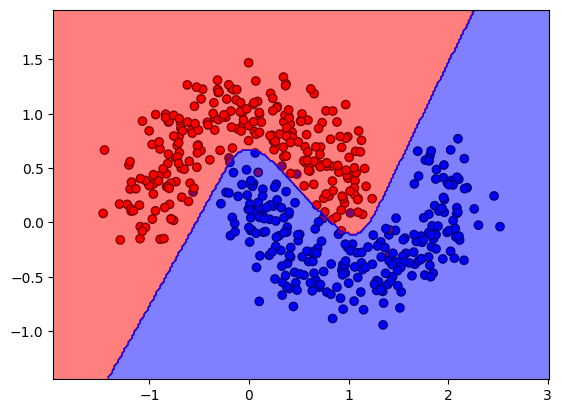

In [16]:
# plotting 
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.02 # step in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
xx_tensor, yy_tensor = torch.tensor(xx, dtype=torch.float), torch.tensor(yy, dtype=torch.float)
Z = net(torch.stack([xx_tensor.flatten(), yy_tensor.flatten()], 1))
Z = Z.detach().numpy()
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c = y.ravel(), edgecolors='k', cmap = cm_bright)
Z_binary = Z>=0.5
Z_binary = Z_binary.reshape(xx.shape)
ax.contourf(xx, yy, Z_binary, cmap=cm_bright, alpha=.5)

## This was equivalent to the NumPy training in the previous practical in terms of the number of epochs, features, optimiser and loss function

## Did it perform more quickly?
Remember, PyTorch tensors are equivalent to NumPy arrays, but they can be used efficiently on GPUs - _should_ this optimisation run more quickly than the NumPy-based one?

## Now switch to a GPU node (instructions on Learn) - run the whole notebook again and see the time difference before moving on to Practical9b.ipynb